# EDA y Desarrollo de Modelo: Nala Data Science Challenge

### Importamos las librerías necesarias

In [158]:
#Manipulación, limpieza y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preparación de datos y features
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#Modelos a utilizar
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Evaluación de modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

#Exportación del modelo
import pickle


### Cargamos el dataset y limpiamos

In [159]:
#Cargamos el dataset
df = pd.read_csv('DS Challenge_Nala.csv', sep = ';')

df.sample(5)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
22701,3363,F,"152,8650054",10/01/2020,9,{'model': 2020; 'device_score': 2; 'os': 'ANDR...,MPago,Merida,FÃ­sica,62000,43,Aceptada,False,0,"1,528650054",False
23297,3458,F,"872,9707782",25/01/2020,17,{'model': 2020; 'device_score': 2; 'os': '%%'},Super,NaN,FÃ­sica,50000,45,Aceptada,True,"87,29707782","7,856737004",False
26912,3993,M,"765,8573519",9/01/2020,18,"{'model': 2020; 'device_score': 5; 'os': ','}",MPago,Merida,FÃ­sica,98000,63,Aceptada,False,"76,58573519","6,892716167",False
2624,391,F,"701,8115793",6/01/2020,21,"{'model': 2020; 'device_score': 1; 'os': ','}",Farmacia,Monterrey,Virtual,92000,38,Aceptada,False,0,"14,03623159",False
20501,3021,F,"544,4416351",11/01/2020,15,"{'model': 2020; 'device_score': 2; 'os': ','}",Abarrotes,NaN,FÃ­sica,50000,51,Aceptada,False,0,"5,444416351",False


In [160]:
#Dividimos la columna de dispositivos
device_cols = df['dispositivo'].str.split(';', n = 2).apply(pd.Series)

device_cols

,0,1,2
0,{'model': 2020,'device_score': 3,'os': 'ANDROID'}
1,{'model': 2020,'device_score': 1,'os': 'ANDROID'}
2,{'model': 2020,'device_score': 1,"'os': ','}"
3,{'model': 2020,'device_score': 3,'os': 'WEB'}
4,{'model': 2020,'device_score': 3,'os': '%%'}
...,...,...,...
26970,{'model': 2020,'device_score': 2,'os': 'ANDROID'}
26971,{'model': 2020,'device_score': 2,'os': 'WEB'}
26972,{'model': 2020,'device_score': 2,'os': 'WEB'}
26973,{'model': 2020,'device_score': 5,"'os': ','}"


In [161]:
#Renombramos columnas
device_cols = device_cols.rename(columns = {0: 'device_model', 1: 'device_score', 2: 'device_os'})

device_cols

,device_model,device_score,device_os
0,{'model': 2020,'device_score': 3,'os': 'ANDROID'}
1,{'model': 2020,'device_score': 1,'os': 'ANDROID'}
2,{'model': 2020,'device_score': 1,"'os': ','}"
3,{'model': 2020,'device_score': 3,'os': 'WEB'}
4,{'model': 2020,'device_score': 3,'os': '%%'}
...,...,...,...
26970,{'model': 2020,'device_score': 2,'os': 'ANDROID'}
26971,{'model': 2020,'device_score': 2,'os': 'WEB'}
26972,{'model': 2020,'device_score': 2,'os': 'WEB'}
26973,{'model': 2020,'device_score': 5,"'os': ','}"


In [162]:
#Las incorporamos al dataset
df = pd.concat([df, device_cols], axis = 1)

In [163]:
#Inspeccionamos con una muestra aleatoria que se hayan agregado correctamente
df.sample(5)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_model,device_score,device_os
14983,2216,M,"629,7321877",11/01/2020,16,{'model': 2020; 'device_score': 1; 'os': '%%'},NaN,Monterrey,Virtual,91000,47,En proceso,True,0,"12,59464375",False,{'model': 2020,'device_score': 1,'os': '%%'}
19346,2845,M,"232,2140713",4/01/2020,10,{'model': 2020; 'device_score': 1; 'os': 'ANDR...,NaN,Monterrey,FÃ­sica,31000,58,Aceptada,False,0,"2,322140713",False,{'model': 2020,'device_score': 1,'os': 'ANDROID'}
13626,2024,M,"742,1476712",29/01/2020,1,{'model': 2020; 'device_score': 2; 'os': 'WEB'},Super,Guadalajara,Virtual,39000,56,Rechazada,False,0,"14,84295342",False,{'model': 2020,'device_score': 2,'os': 'WEB'}
25485,3775,M,"227,7330597",11/01/2020,10,{'model': 2020; 'device_score': 4; 'os': 'WEB'},NaN,NaN,Virtual,94000,53,Aceptada,False,"22,77330597","4,099195075",False,{'model': 2020,'device_score': 4,'os': 'WEB'}
4953,752,F,"438,094177",26/01/2020,17,{'model': 2020; 'device_score': 3; 'os': '%%'},Farmacia,NaN,FÃ­sica,51000,60,Aceptada,False,0,"4,38094177",False,{'model': 2020,'device_score': 3,'os': '%%'}


In [164]:
#Sacamos las columnas que no utilizaremos
df.drop(columns = ['dispositivo', 'ID_USER'],inplace = True, index = 1)

In [165]:
#Comprobamos
df.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_model,device_score,device_os
0,F,"608,3456335",21/01/2020,20,Super,Merida,FÃ­sica,71000,51,Aceptada,False,"60,83456335","5,475110702",False,{'model': 2020,'device_score': 3,'os': 'ANDROID'}
2,F,"790,0376533",17/01/2020,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0,"15,80075307",False,{'model': 2020,'device_score': 1,"'os': ','}"
3,F,"767,0053873",5/01/2020,11,MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"7,670053873",False,{'model': 2020,'device_score': 3,'os': 'WEB'}
4,F,"254,1710526",30/01/2020,10,NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"2,541710526",False,{'model': 2020,'device_score': 3,'os': '%%'}
5,F,"37,00374724",27/01/2020,3,NaN,Guadalajara,FÃ­sica,94000,56,Rechazada,False,0,"0,370037472",False,{'model': 2020,'device_score': 2,'os': '%%'}


In [166]:
#Limpiamos nuestras nuevas columnas para ser analizadas más fácilmente
df['device_model'] = df['device_model'].map(lambda x: x.lstrip("{'model':"))
df['device_score'] = df['device_score'].map(lambda x: x.replace("'device_score':",""))
df['device_os'] = df['device_os'].map(lambda x: x.lstrip("'os': '").rstrip("'}"))

df['device_score'] = df['device_score'].astype(int)

In [167]:
#Cambiamos comas por puntos, para mejor manipulación posteriormente
df['cashback'] = df['cashback'].map(lambda x: x.replace(",","."))
df['dcto'] = df['dcto'].map(lambda x: x.replace(",","."))
df['monto'] = df['monto'].map(lambda x: x.replace(",","."))

In [168]:
#Cambiamos tipos de variables
df['cashback'] = df['cashback'].astype(float)
df['dcto'] = df['dcto'].astype(float)
df['monto'] = df['monto'].astype(float)

In [169]:
#Sustituimos
df['tipo_tc'] = df['tipo_tc'].str.replace('FÃ­sica', 'Fisica')

In [170]:
#Ajustamos columna de fecha y creamos columnas para mes y año
df['fecha'] = df['fecha'].astype('datetime64[ns]')
df['mes'] = pd.DatetimeIndex(df['fecha']).month
df['año'] = pd.DatetimeIndex(df['fecha']).year

In [171]:
#Revisamos que no hayan valores anormales
print(df.mes.sort_values().unique())
print(df.año.sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2020]


In [172]:
#Comprobamos que todo esté bien con una muestra aleatoria
df.sample(5)

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_model,device_score,device_os,mes,año
24355,M,862.064527,2020-01-24,7,Abarrotes,Merida,Virtual,81000,33,Aceptada,False,0.00000,17.241291,False,2020,3,",",1,2020
1236,--,219.546680,2020-01-22,17,Restaurante,NaN,Fisica,28000,41,Aceptada,False,0.00000,2.195467,False,2020,4,ANDROID,1,2020
4665,M,822.933912,2020-12-01,20,Restaurante,Guadalajara,Virtual,49000,44,Aceptada,False,0.00000,16.458678,False,2020,2,%%,12,2020
7604,M,911.867675,2020-01-15,9,Abarrotes,Monterrey,Virtual,71000,61,Aceptada,True,0.00000,18.237354,False,2020,3,ANDROID,1,2020
10426,F,922.597802,2020-04-01,14,NaN,NaN,Fisica,51000,57,Aceptada,False,92.25978,8.303380,False,2020,5,WEB,4,2020


In [173]:
#Revisamos si hay valores vacíos, estos features no serán incorporados en nuestro modelo
df.isnull().sum()

genero                 0
monto                  0
fecha                  0
hora                   0
establecimiento    10118
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
device_model           0
device_score           0
device_os              0
mes                    0
año                    0
dtype: int64

In [174]:
#Revisamos nuestros tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26974 entries, 0 to 26974
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genero           26974 non-null  object        
 1   monto            26974 non-null  float64       
 2   fecha            26974 non-null  datetime64[ns]
 3   hora             26974 non-null  int64         
 4   establecimiento  16856 non-null  object        
 5   ciudad           15296 non-null  object        
 6   tipo_tc          26974 non-null  object        
 7   linea_tc         26974 non-null  int64         
 8   interes_tc       26974 non-null  int64         
 9   status_txn       26974 non-null  object        
 10  is_prime         26974 non-null  bool          
 11  dcto             26974 non-null  float64       
 12  cashback         26974 non-null  float64       
 13  fraude           26974 non-null  bool          
 14  device_model     26974 non-null  objec

### Análisis Exploratorio de Datos

In [175]:
#Vemos nuestras variables numéricas
numeric_cols = df._get_numeric_data()

numeric_cols.head()

,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback,fraude,device_score,mes,año
0,608.345633,20,71000,51,False,60.834563,5.475111,False,3,1,2020
2,790.037653,11,94000,56,False,0.000000,15.800753,False,1,1,2020
3,767.005387,11,94000,56,False,0.000000,7.670054,False,3,5,2020
4,254.171053,10,94000,56,False,0.000000,2.541711,False,3,1,2020
5,37.003747,3,94000,56,False,0.000000,0.370037,False,2,1,2020


In [176]:
#Y comenzamos a ver algunas estadísticas 
numeric_cols.describe()

,monto,hora,linea_tc,interes_tc,dcto,cashback,device_score,mes,año
count,26974.000000,26974.000000,26974.000000,26974.000000,26974.000000,26974.000000,26974.000000,26974.000000,26974.0
mean,499.084705,11.987803,62476.495885,48.224772,17.466782,6.261352,3.002669,3.270816,2020.0
std,289.304091,6.642619,21887.237089,9.587418,34.335038,4.458439,1.417406,3.504380,0.0
min,0.017303,1.000000,25000.000000,32.000000,0.000000,0.000138,1.000000,1.000000,2020.0
25%,246.525092,6.000000,44000.000000,40.000000,0.000000,2.792318,2.000000,1.000000,2020.0
50%,500.520141,12.000000,62000.000000,48.000000,0.000000,5.636734,3.000000,1.000000,2020.0
75%,749.598774,18.000000,82000.000000,57.000000,18.777996,8.531822,4.000000,5.000000,2020.0
max,999.917764,23.000000,99000.000000,64.000000,199.356251,19.991582,5.000000,12.000000,2020.0


<AxesSubplot:>

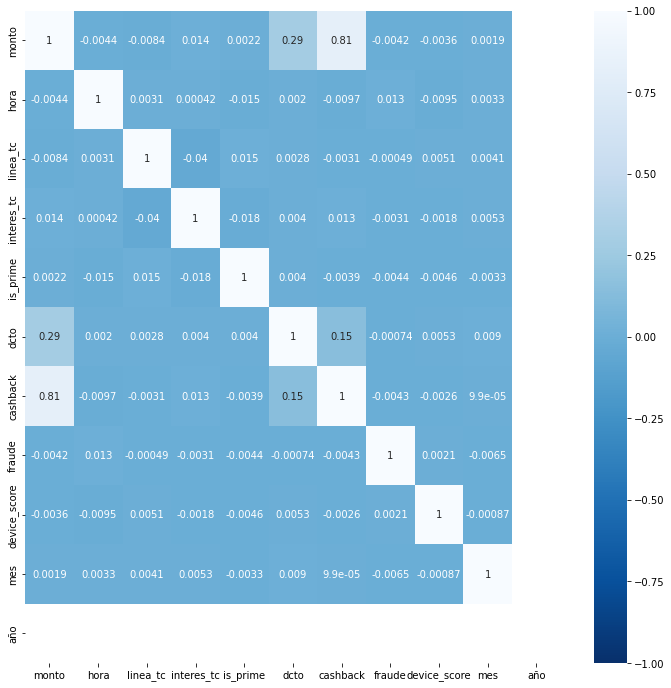

In [177]:
#Observamos si existe alguna correlación en nuestros datos
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

sns.heatmap(numeric_cols.corr(), vmin=-1, vmax=1, annot=True, cmap = 'Blues_r')

No parece haber correlaciones significativas en nuestras variables, salvo entre monto y cashback. Esto no parece indicar uque sean variables de interés para nuestro análisis y/o modelo, sino un indicio de que los datos en nuestro dataset tienen sentido.

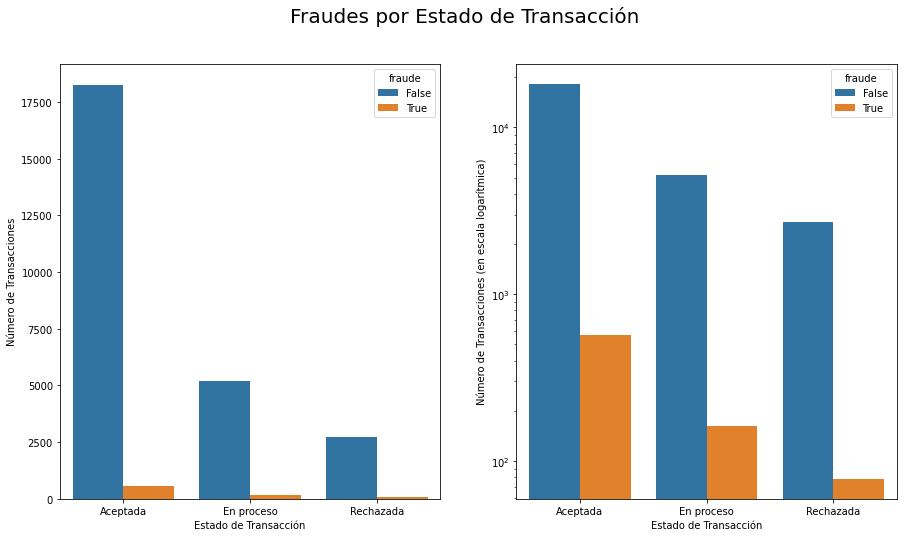

In [178]:
#Observamos la distribución de transacciones fraudulentas por estado de transacción
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.subplot(1,2,1)
status_txn_1 = sns.countplot(data = df, x = 'status_txn', hue = 'fraude')
plt.xlabel('Estado de Transacción')
plt.ylabel('Número de Transacciones')

plt.subplot(1,2,2)
status_txn_2 = sns.countplot(data = df, x = 'status_txn', hue = 'fraude')
status_txn_2.set_yscale('log')
plt.xlabel('Estado de Transacción')
plt.ylabel('Número de Transacciones (en escala logarítmica)')


plt.suptitle('Fraudes por Estado de Transacción', size = 20)
plt.show()

<AxesSubplot:xlabel='monto', ylabel='cashback'>

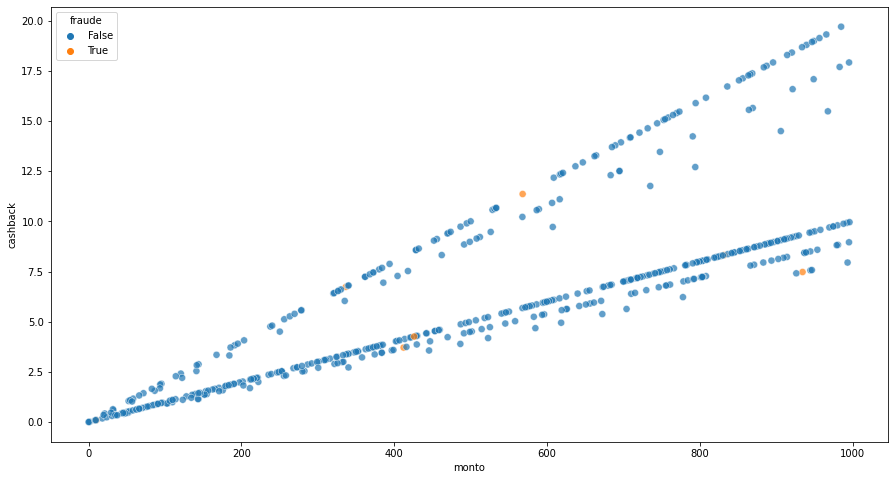

In [179]:
#Observamos si existe relación entre el monto, cashback y fraudes
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

sns.scatterplot(data = df.sample(500), x = 'monto', y = 'cashback',hue = 'fraude', s = 50, alpha = 0.7)

Podemos ver que existe una relación directa entre el monto y el cashback, pero que el cashback no es el mismo para todos los clientes, por lo que crearemos una nueva columna llamada percent_cashback.

In [180]:
#Creamos la nueva columna
df['percent_cashback'] = (df['cashback']/df['monto'])*100
df['percent_cashback'] = df.percent_cashback.round(1)
df.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_model,device_score,device_os,mes,año,percent_cashback
0,F,608.345633,2020-01-21,20,Super,Merida,Fisica,71000,51,Aceptada,False,60.834563,5.475111,False,2020,3,ANDROID,1,2020,0.9
2,F,790.037653,2020-01-17,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,2020,1,",",1,2020,2.0
3,F,767.005387,2020-05-01,11,MPago,Guadalajara,Fisica,94000,56,Aceptada,False,0.000000,7.670054,False,2020,3,WEB,5,2020,1.0
4,F,254.171053,2020-01-30,10,NaN,Guadalajara,Fisica,94000,56,Aceptada,False,0.000000,2.541711,False,2020,3,%%,1,2020,1.0
5,F,37.003747,2020-01-27,3,NaN,Guadalajara,Fisica,94000,56,Rechazada,False,0.000000,0.370037,False,2020,2,%%,1,2020,1.0


In [181]:
#Comprobamos que hay diferentes porcentajes de cashback por transacción
df.percent_cashback.unique()

array([0.9, 2. , 1. , 1.8, 1.6, 0.8])

In [182]:
#Creamos un subset de los fraudes en nuestro dataset
fraudes = df[df['fraude'] == True]

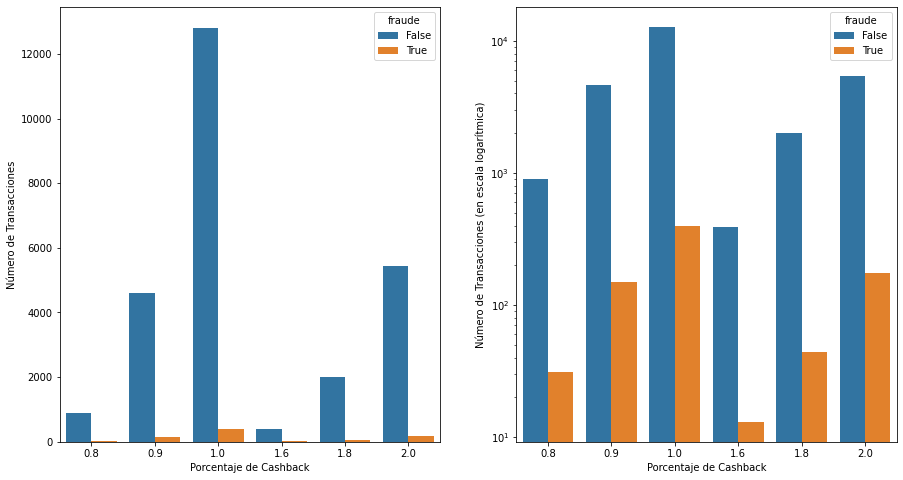

In [183]:
#Observamos la distribución de transacciones por porcentaje de cashback
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.subplot(1,2,1)
count_cashback = sns.countplot(data = df, x = 'percent_cashback', hue = 'fraude')
plt.xlabel('Porcentaje de Cashback')
plt.ylabel('Número de Transacciones')

plt.subplot(1,2,2)
count_cashback = sns.countplot(data = df, x = 'percent_cashback', hue = 'fraude')
plt.xlabel('Porcentaje de Cashback')
plt.ylabel('Número de Transacciones (en escala logarítmica)')
count_cashback.set_yscale('log')

plt.show()

El porcentaje de cashback no parece influir significativamente, el número de fraudes tiende a ser proporcional a la cantidad de transacciones por cashback.

<AxesSubplot:xlabel='monto', ylabel='dcto'>

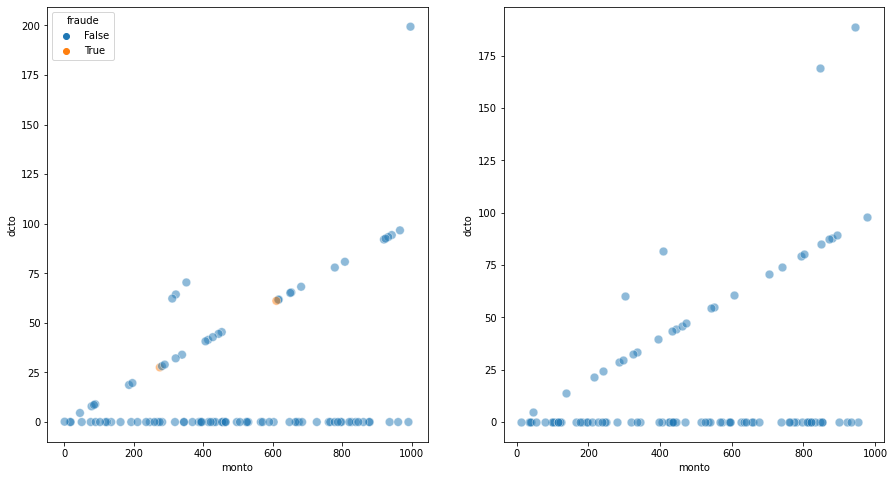

In [184]:
#Realizamos el mismo análisis, pero esta vez con montos y descuentos
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

#df
plt.subplot(1,2,1)
sns.scatterplot(data = df.sample(100), x = 'monto', y = 'dcto', hue = 'fraude',s = 75, alpha = 0.5)

#fraudes
plt.subplot(1,2,2)
sns.scatterplot(data = fraudes.sample(100), x = 'monto', y = 'dcto',s = 75, alpha = 0.5)

Observamos un patrón similar a los gráficos de cashback, por lo que crearemos la misma columna de porcentaje para monto.

In [185]:
#Creamos la columna
df['percent_disc'] = (df['dcto']/df['monto'])*100
df['percent_disc'] = df.percent_disc.round(1)

df.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,...,dcto,cashback,fraude,device_model,device_score,device_os,mes,año,percent_cashback,percent_disc
0,F,608.345633,2020-01-21,20,Super,Merida,Fisica,71000,51,Aceptada,...,60.834563,5.475111,False,2020,3,ANDROID,1,2020,0.9,10.0
2,F,790.037653,2020-01-17,11,NaN,Guadalajara,Virtual,94000,56,En proceso,...,0.000000,15.800753,False,2020,1,",",1,2020,2.0,0.0
3,F,767.005387,2020-05-01,11,MPago,Guadalajara,Fisica,94000,56,Aceptada,...,0.000000,7.670054,False,2020,3,WEB,5,2020,1.0,0.0
4,F,254.171053,2020-01-30,10,NaN,Guadalajara,Fisica,94000,56,Aceptada,...,0.000000,2.541711,False,2020,3,%%,1,2020,1.0,0.0
5,F,37.003747,2020-01-27,3,NaN,Guadalajara,Fisica,94000,56,Rechazada,...,0.000000,0.370037,False,2020,2,%%,1,2020,1.0,0.0


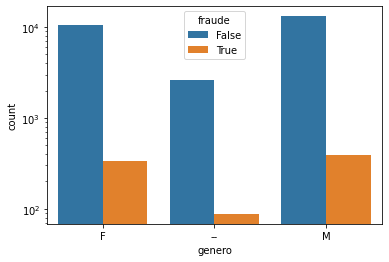

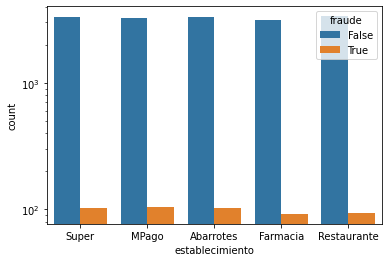

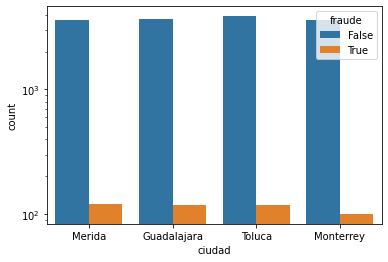

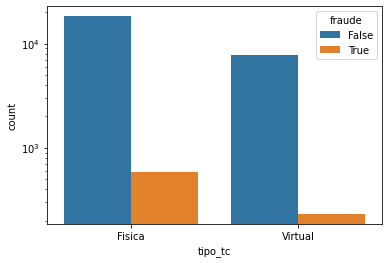

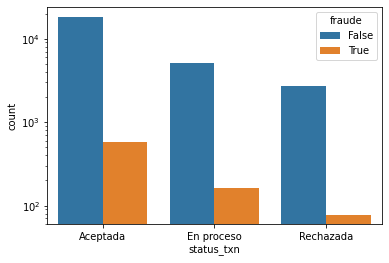

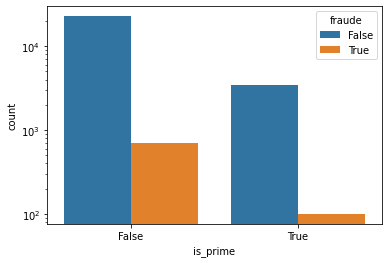

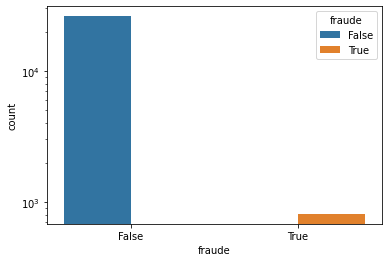

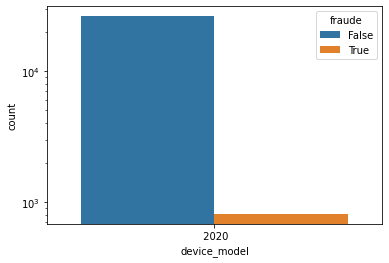

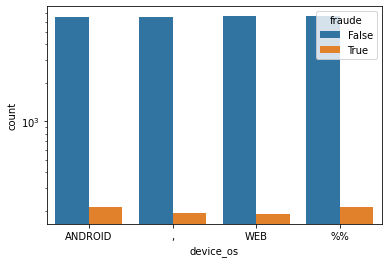

In [186]:
#Observamos si existe algún patrón en nuestras variables categóricas
df_1 = df.select_dtypes(['object','boolean'])

for i, col in enumerate(df_1):
    plt.figure(i)
    chart = sns.countplot(x = col, data = df_1, hue = 'fraude')
    chart.set_yscale('log')

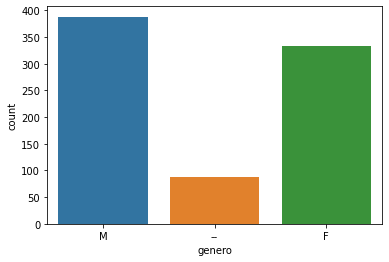

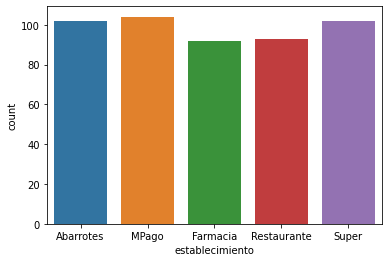

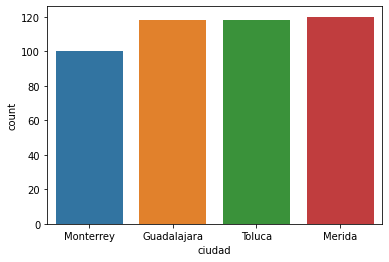

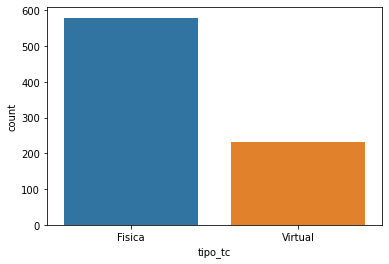

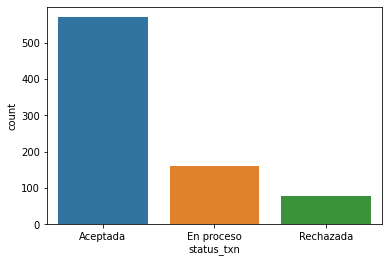

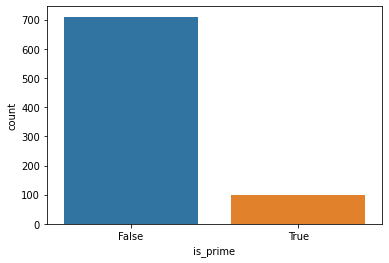

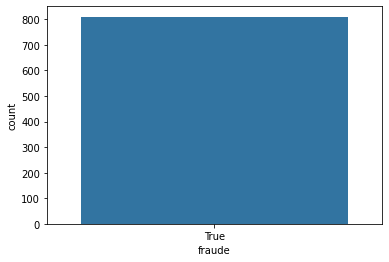

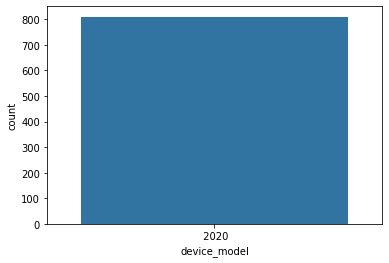

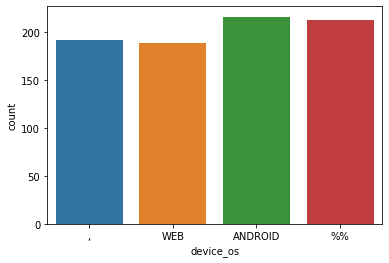

In [187]:
#Hacemos zoom in sólo en los fraudes
fraud_cols = fraudes.select_dtypes(['object','boolean'])

for i, col in enumerate(df_1):
    plt.figure(i)
    sns.countplot(x = col, data = fraud_cols)

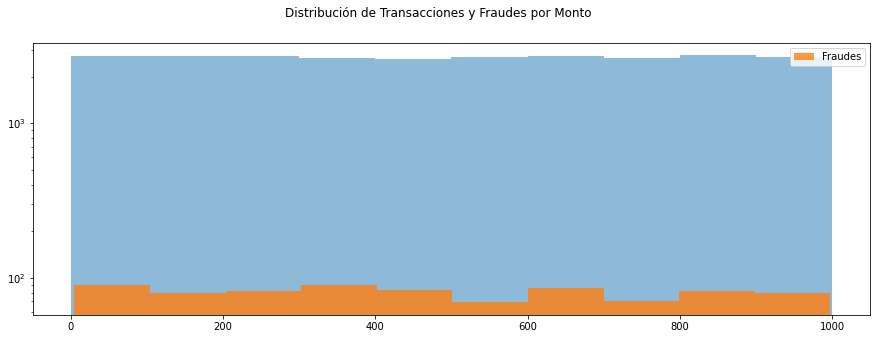

In [188]:
#Observamos cómo se distribuyen las transacciones regulares y fraudulentas por monto
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

ax.hist(df.monto, alpha = 0.5)
ax.hist(fraudes.monto, alpha = 0.8, label = 'Fraudes')
ax.legend()
ax.set_yscale('log')
fig.suptitle('Distribución de Transacciones y Fraudes por Monto')

plt.show()

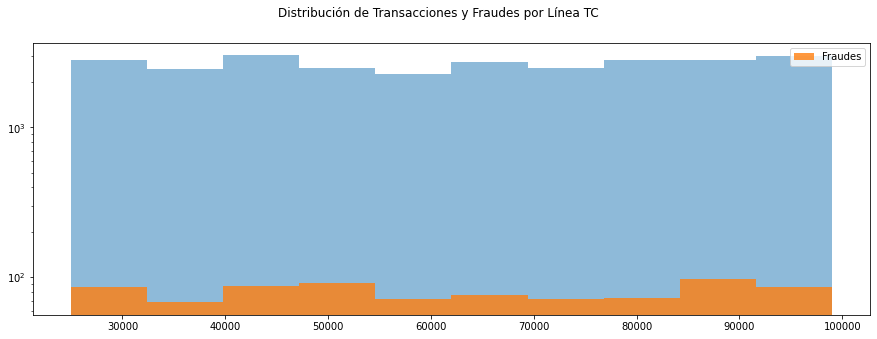

In [189]:
#Mismo para Línea TC
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

ax.hist(df.linea_tc, alpha = 0.5)
ax.hist(fraudes.linea_tc, alpha = 0.8, label = 'Fraudes')
ax.legend()
ax.set_yscale('log')
fig.suptitle('Distribución de Transacciones y Fraudes por Línea TC')

plt.show()

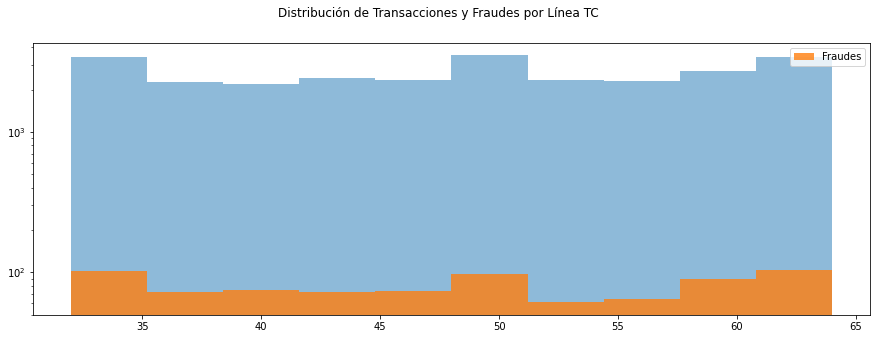

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

ax.hist(df.interes_tc, alpha = 0.5)
ax.hist(fraudes.interes_tc, alpha = 0.8, label = 'Fraudes')
ax.legend()
ax.set_yscale('log')
fig.suptitle('Distribución de Transacciones y Fraudes por Línea TC')

plt.show()

No parecen haber variaciones significativas en ambos gráficos

## Preparación del Dataset y Diseño del Modelo

<AxesSubplot:>

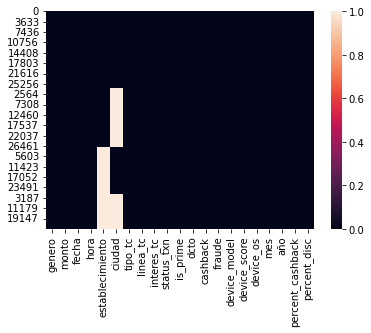

In [191]:
#Graficamos rápidamente los valores faltantes
sns.heatmap(df.isna().sort_values(by = ['establecimiento','ciudad']))

In [192]:
#Observamos qué porcentaje representan del total
null_totals = df.isnull().sum().sort_values(ascending = False)
percent_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_df = pd.concat([null_totals, percent_nulls], axis = 1, keys = ['total_nulls', 'percent_total'])

missing_df

,total_nulls,percent_total
ciudad,11678,0.432935
establecimiento,10118,0.375102
genero,0,0.000000
cashback,0,0.000000
percent_cashback,0,0.000000
año,0,0.000000
mes,0,0.000000
device_os,0,0.000000
device_score,0,0.000000
device_model,0,0.000000


In [193]:
#Sacamos las columnas con datos faltantes e irrelevantes
df.drop(columns = ['establecimiento','ciudad', 'device_model'], axis= 1, inplace = True)

In [194]:
#Comprobamos
df.head()

,genero,monto,fecha,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,device_os,mes,año,percent_cashback,percent_disc
0,F,608.345633,2020-01-21,20,Fisica,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,1,2020,0.9,10.0
2,F,790.037653,2020-01-17,11,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,",",1,2020,2.0,0.0
3,F,767.005387,2020-05-01,11,Fisica,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,5,2020,1.0,0.0
4,F,254.171053,2020-01-30,10,Fisica,94000,56,Aceptada,False,0.000000,2.541711,False,3,%%,1,2020,1.0,0.0
5,F,37.003747,2020-01-27,3,Fisica,94000,56,Rechazada,False,0.000000,0.370037,False,2,%%,1,2020,1.0,0.0


In [195]:
#Codificamos la variable objetivo
encoder = OneHotEncoder(sparse = False)

result = encoder.fit_transform(df[['fraude']])
fraud_ = pd.DataFrame(result, columns = list(encoder.categories_[0]))

print(fraud_.value_counts())

df_ml = pd.concat([df, fraud_], axis = 1)

False  True
1.0    0.0     26164
0.0    1.0       810
dtype: int64


In [196]:
#Sacamos la columna de fraude
df_ml.drop(['fraude', False], axis = 1, inplace = True)

In [197]:
#Sacamos nuevamente los campos vacíos
df_ml.dropna(how = 'any', inplace = True)

In [198]:
#Renombramos para una manipulación más sencilla
df_ml = df_ml.rename({True:'is_True'}, axis = 1)

df_ml.head()

,genero,monto,fecha,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,device_score,device_os,mes,año,percent_cashback,percent_disc,is_True
0,F,608.345633,2020-01-21,20.0,Fisica,71000.0,51.0,Aceptada,False,60.834563,5.475111,3.0,ANDROID,1.0,2020.0,0.9,10.0,0.0
2,F,790.037653,2020-01-17,11.0,Virtual,94000.0,56.0,En proceso,False,0.000000,15.800753,1.0,",",1.0,2020.0,2.0,0.0,0.0
3,F,767.005387,2020-05-01,11.0,Fisica,94000.0,56.0,Aceptada,False,0.000000,7.670054,3.0,WEB,5.0,2020.0,1.0,0.0,0.0
4,F,254.171053,2020-01-30,10.0,Fisica,94000.0,56.0,Aceptada,False,0.000000,2.541711,3.0,%%,1.0,2020.0,1.0,0.0,0.0
5,F,37.003747,2020-01-27,3.0,Fisica,94000.0,56.0,Rechazada,False,0.000000,0.370037,2.0,%%,1.0,2020.0,1.0,0.0,0.0


Ahora seleccionaremos las features que incorporaremos a nuestro modelo. En este caso, al ser un prototipo inicial para ser puesto en producción, sólo tomaremos las variables numéricas del dataset.

In [199]:
#Dividimos en Train y Test

x = df_ml[['monto', 'hora', 'percent_disc', 'percent_cashback', 'device_score', 'linea_tc', 'mes']]

y = df_ml[['is_True']]

y.value_counts()

df_ml_dmatrix = xgb.DMatrix(data = x, label = y)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 42)

In [200]:
#Observamos nuestro dataset de features
x.head()

,monto,hora,percent_disc,percent_cashback,device_score,linea_tc,mes
0,608.345633,20.0,10.0,0.9,3.0,71000.0,1.0
2,790.037653,11.0,0.0,2.0,1.0,94000.0,1.0
3,767.005387,11.0,0.0,1.0,3.0,94000.0,5.0
4,254.171053,10.0,0.0,1.0,3.0,94000.0,1.0
5,37.003747,3.0,0.0,1.0,2.0,94000.0,1.0


In [201]:
#Entrenamos los modelos a utilizar: Logistic Regression, Random Forest y XGBoost

lr = LogisticRegression()
lr.fit(x_train, y_train.values.ravel())
predict_lr = lr.predict(x_test)
print('Logistic Regression Score: ',lr.score(x_test, y_test))
lr_coef = lr.coef_[0]

random_forest = RandomForestClassifier(n_estimators = 200, max_features= 0.4, max_depth= 10, criterion = 'entropy', random_state= 0)
random_forest.fit(x_train, y_train.values.ravel())
predict_rf = random_forest.predict(x_test)
print('Random Forest Score: ', random_forest.score(x_test, y_test))

xg = xgb.XGBClassifier(n_estimators= 200,max_depth = 5, seed = 0, eval_metric = ['error', 'logloss'], use_label_encoder= False)
xg.fit(x_train, y_train.values.ravel())
predict_xg = xg.predict(x_test)
print('XGBoost Score: ', xg.score(x_test, y_test))

Logistic Regression Score:  0.968564650059312
Random Forest Score:  0.968564650059312
XGBoost Score:  0.9684163701067615


Podemos ver que el accuracy es demasiado alto, lo que indica un overfit del modelo. Realizaremos una validación cruzada para comprobar esto

In [202]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr, x_train, y_train.values.ravel(), cv = 10)
cv_rf = cross_val_score(random_forest, x_train, y_train.values.ravel(), cv = 10)
cv_xg = cross_val_score(xg, x_train, y_train.values.ravel(), cv = 10)

print('LR Cross Validation Scores: ',cv_lr)
print('Random Forest Cross Validation Scores: ',cv_rf)
print('Random Forest Cross Validation Scores: ',cv_xg)

LR Cross Validation Scores:  [0.97083539 0.97034108 0.97034108 0.97034108 0.97034108 0.97034108
 0.97034108 0.97034108 0.97034108 0.97082097]
Random Forest Cross Validation Scores:  [0.97083539 0.97034108 0.97034108 0.97034108 0.97034108 0.97034108
 0.97034108 0.97034108 0.97034108 0.97082097]
Random Forest Cross Validation Scores:  [0.97083539 0.97034108 0.96935245 0.96984676 0.96935245 0.96984676
 0.96885813 0.96984676 0.97034108 0.97032641]


Ahora armaremos la matriz de confusión para cada modelo

In [203]:
prediction_lr = lr.predict(x_test)

prediction_rf = random_forest.predict(x_test)

prediction_xg = xg.predict(x_test)

In [204]:
#Regresión Logística
pd.DataFrame(confusion_matrix(y_test, predict_lr), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,6532,0
Actual Yes,212,0


In [205]:
#Random Forest
pd.DataFrame(confusion_matrix(y_test, predict_rf), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,6532,0
Actual Yes,212,0


In [206]:
#Xgboost
pd.DataFrame(confusion_matrix(y_test, predict_xg), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,6531,1
Actual Yes,212,0


In [207]:
#Evaluamos nuestro modelo
import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_test,predict_lr))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      6532
         1.0       0.00      0.00      0.00       212

    accuracy                           0.97      6744
   macro avg       0.48      0.50      0.49      6744
weighted avg       0.94      0.97      0.95      6744



In [208]:
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      6532
         1.0       0.00      0.00      0.00       212

    accuracy                           0.97      6744
   macro avg       0.48      0.50      0.49      6744
weighted avg       0.94      0.97      0.95      6744



In [209]:
#Vemos las variables con mayor incidencia en el modelo de Regresión Logística, que será el que pondremos en producción
incidencia_lr = pd.DataFrame(lr_coef, 
                     x.columns, 
                     columns=['coef'])\
                    .sort_values(by='coef', ascending=False)

print (incidencia_lr.sort_values(by = 'coef'))

                      coef
monto            -0.001870
hora             -0.000044
linea_tc         -0.000044
percent_disc     -0.000012
device_score     -0.000012
mes              -0.000011
percent_cashback -0.000005


In [210]:
#Guardamos el modelo
filename = 'logistic_regression_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [211]:
#Comprobamos que se puede cargar y abrir correctamente
loaded_model = pickle.load(open('logistic_regression_model.pkl','rb'))
result = loaded_model.score(x_test, y_test)

result

0.968564650059312

Por cuestiones de tiempo, no se siguieron realizando pruebas para incrementar la efectividad del modelo, sin embargo, uno de los métodos que se utilizó fue el de normalización.

Puede verse el código utilizado en la sección de Apéndice.

## Apéndice

Para mejorar la efectividad del modelo, se procedió a crear un nuevo dataset con data normalizada. 

De igual manera, el algoritmo siguió memorizando el dataset y se obtuvieron los mismos resultados.


In [212]:
normalized_df = df[['monto', 'hora', 'percent_disc', 'percent_cashback', 'device_score', 'linea_tc', 'mes']]

In [213]:

norm = '_norm'
for i in enumerate(normalized_df.columns): 
  normalized_df[i[1]+norm] = (normalized_df[i[1]] - normalized_df[i[1]].mean()) / normalized_df[i[1]].std()

normalized_df.head()

,monto,hora,percent_disc,percent_cashback,device_score,linea_tc,mes,monto_norm,hora_norm,percent_disc_norm,percent_cashback_norm,device_score_norm,linea_tc_norm,mes_norm
0,608.345633,20,10.0,0.9,3,71000,1,0.377668,1.206180,1.133566,-0.788129,-0.001883,0.389428,-0.647994
2,790.037653,11,0.0,2.0,1,94000,1,1.005699,-0.148707,-0.615579,1.665199,-1.412912,1.440269,-0.647994
3,767.005387,11,0.0,1.0,3,94000,5,0.926087,-0.148707,-0.615579,-0.565099,-0.001883,1.440269,0.493435
4,254.171053,10,0.0,1.0,3,94000,1,-0.846561,-0.299250,-0.615579,-0.565099,-0.001883,1.440269,-0.647994
5,37.003747,3,0.0,1.0,2,94000,1,-1.597215,-1.353051,-0.615579,-0.565099,-0.707397,1.440269,-0.647994


In [214]:
normalized_df.drop(columns = 'linea_tc', axis = 1, inplace = True)

normalized_df.head()

,monto,hora,percent_disc,percent_cashback,device_score,mes,monto_norm,hora_norm,percent_disc_norm,percent_cashback_norm,device_score_norm,linea_tc_norm,mes_norm
0,608.345633,20,10.0,0.9,3,1,0.377668,1.206180,1.133566,-0.788129,-0.001883,0.389428,-0.647994
2,790.037653,11,0.0,2.0,1,1,1.005699,-0.148707,-0.615579,1.665199,-1.412912,1.440269,-0.647994
3,767.005387,11,0.0,1.0,3,5,0.926087,-0.148707,-0.615579,-0.565099,-0.001883,1.440269,0.493435
4,254.171053,10,0.0,1.0,3,1,-0.846561,-0.299250,-0.615579,-0.565099,-0.001883,1.440269,-0.647994
5,37.003747,3,0.0,1.0,2,1,-1.597215,-1.353051,-0.615579,-0.565099,-0.707397,1.440269,-0.647994


In [215]:
normalized_df = pd.merge(normalized_df, df[['fraude']], left_index= True, right_index = True)

normalized_df

,monto,hora,percent_disc,percent_cashback,device_score,mes,monto_norm,hora_norm,percent_disc_norm,percent_cashback_norm,device_score_norm,linea_tc_norm,mes_norm,fraude
0,608.345633,20,10.0,0.9,3,1,0.377668,1.206180,1.133566,-0.788129,-0.001883,0.389428,-0.647994,False
2,790.037653,11,0.0,2.0,1,1,1.005699,-0.148707,-0.615579,1.665199,-1.412912,1.440269,-0.647994,False
3,767.005387,11,0.0,1.0,3,5,0.926087,-0.148707,-0.615579,-0.565099,-0.001883,1.440269,0.493435,False
4,254.171053,10,0.0,1.0,3,1,-0.846561,-0.299250,-0.615579,-0.565099,-0.001883,1.440269,-0.647994,False
5,37.003747,3,0.0,1.0,2,1,-1.597215,-1.353051,-0.615579,-0.565099,-0.707397,1.440269,-0.647994,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,746.192089,13,0.0,1.0,2,8,0.854144,0.152379,-0.615579,-0.565099,-0.707397,-1.026922,1.349507,False
26971,941.804966,15,0.0,1.0,2,1,1.530294,0.453465,-0.615579,-0.565099,-0.707397,-1.026922,-0.647994,False
26972,251.189885,11,0.0,2.0,2,1,-0.856866,-0.148707,-0.615579,1.665199,-0.707397,-1.026922,-0.647994,False
26973,24.182665,17,10.0,0.9,5,1,-1.641532,0.754551,1.133566,-0.788129,1.409145,-1.026922,-0.647994,False
